In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv('sample_data/salary_database.csv', sep=",")
df = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Country', 'Race']]
df.drop(df[df.Salary.isna()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df['Age'] = df['Age'].map(int)
df['Years of Experience'] = df['Years of Experience'].map(int)
df['Salary'] = df['Salary'].map(int)
df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
2,45,Male,PhD,Senior Manager,15,150000,Canada,White
3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
4,52,Male,Master's,Director,20,200000,USA,Asian
...,...,...,...,...,...,...,...,...
6694,49,Female,PhD,Director of Marketing,20,200000,UK,Mixed
6695,32,Male,High School,Sales Associate,3,50000,Australia,Australian
6696,30,Female,Bachelor's Degree,Financial Manager,4,55000,China,Chinese
6697,46,Male,Master's Degree,Marketing Manager,14,140000,China,Korean


# Evolution du salaire avec l'expérience

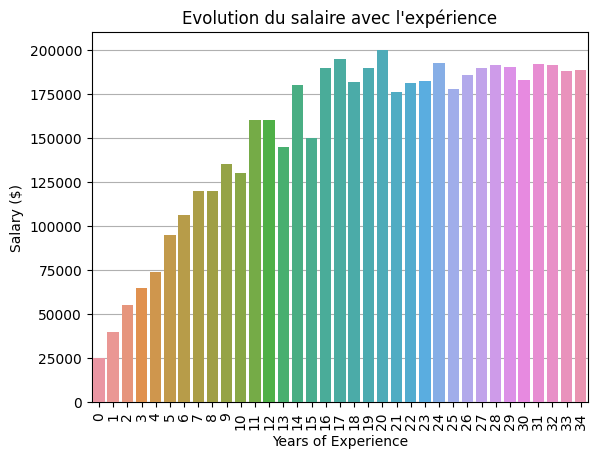

In [21]:
plt.xticks(rotation=90)
ax = sns.barplot(data=df, x='Years of Experience', y='Salary', estimator='median', zorder=3, errorbar=None)
ax.set(ylabel='Salary ($)', title="Evolution du salaire avec l'expérience"),
ax.grid(axis='y', zorder=0)

plt.show()

# Evolution du salaire avec le niveau d'éducation

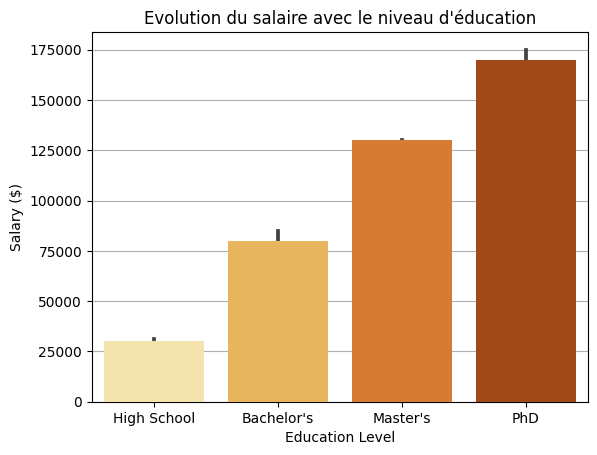

In [22]:
df1 = df
df1['Education Level'].replace("Master's Degree", "Master's", inplace=True)
df1['Education Level'].replace("Bachelor's Degree","Bachelor's",inplace=True)
df1['Education Level'].replace("phD","PhD",inplace=True)

df1['Education Level'] = pd.Categorical(df['Education Level'], categories=["High School", "Bachelor's", "Master's", "PhD"], ordered=True)

ax = sns.barplot(data=df1, x='Education Level', y='Salary', estimator='median', palette='YlOrBr', zorder=3)
ax.set(ylabel='Salary ($)', title="Evolution du salaire avec le niveau d'éducation"),
ax.grid(axis='y', zorder=0)

plt.show()

# Salaire par poste

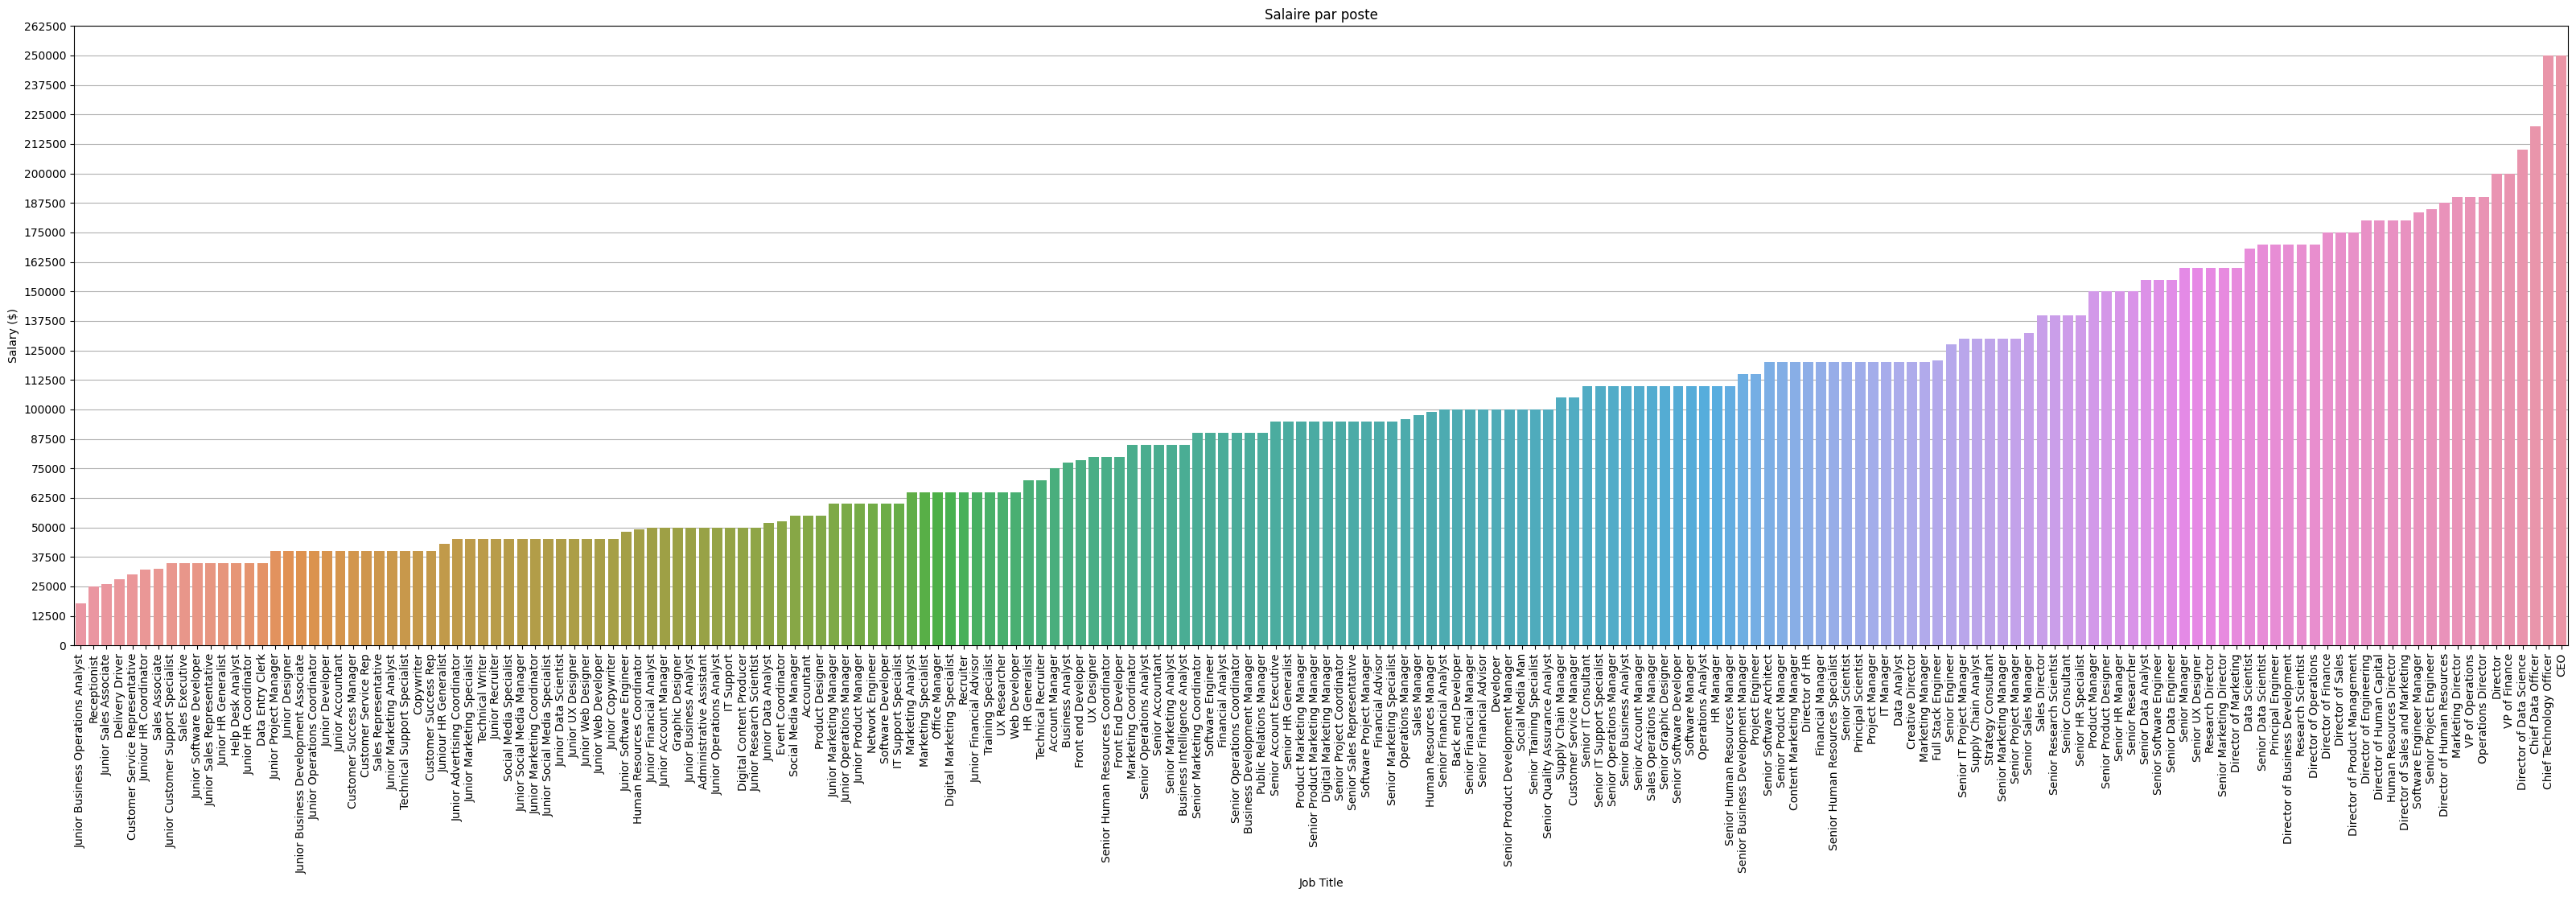

In [23]:
df2 = df

plt.figure(figsize=(40, 10))
plt.xticks(rotation=90)

df2 = df2[['Job Title', 'Salary']]
df2 = df2.groupby(df['Job Title']).median(numeric_only=True)
df2.sort_values('Salary', inplace=True)
df2.reset_index(drop=False, inplace=True)

ax = sns.barplot(x='Job Title', y='Salary', data=df2, zorder=3)
ax.set(ylabel='Salary ($)', title="Salaire par poste")
plt.yticks(range(0,275000, 12500))
ax.grid(axis='y', zorder=0)

plt.show()